<a href="https://colab.research.google.com/github/Naomika123/epochs-of-early-universe/blob/main/big_bang_nucleosynthesis_abundances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/cgiovanetti/LINX.git
%cd LINX

!pip install -r requirements.txt

Cloning into 'LINX'...
remote: Enumerating objects: 738, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 738 (delta 83), reused 103 (delta 45), pack-reused 584 (from 2)
Receiving objects: 100% (738/738), 68.79 MiB | 31.73 MiB/s, done.
Resolving deltas: 100% (306/306), done.
/content/LINX
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.2/193.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import jax

In [5]:
from jax import numpy as jnp
import matplotlib.pyplot as plt

from linx.background import BackgroundModel
from linx.nuclear import NuclearRates
from linx.abundances import AbundanceModel

In [6]:
bkg_model = BackgroundModel()

In [7]:
fast_bkg = BackgroundModel(LO=False, NLO=False)

In [30]:
t_vec, a_vec, rho_g_vec, rho_nu_vec, rho_NP_vec, p_NP_vec, Neff_vec = bkg_model(jnp.asarray(5.0))
t_fast, a_fast, rho_g_f, rho_nu_f, rho_NP_f, p_NP_f, Neff_fast = fast_bkg(jnp.asarray(0.0))


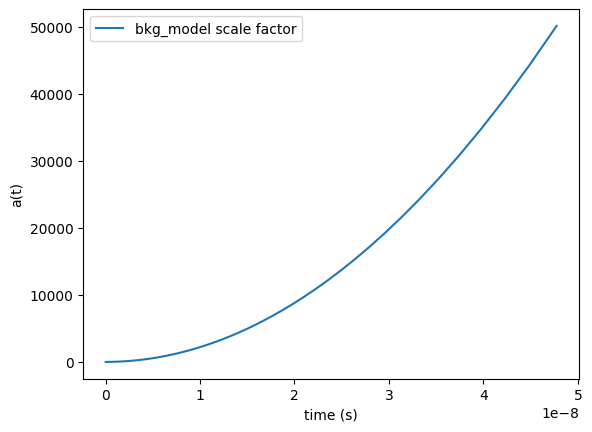

In [31]:
plt.plot(a_vec, t_vec, label = "bkg_model scale factor")
plt.xlabel("time (s)")
plt.ylabel("a(t)")
plt.legend()

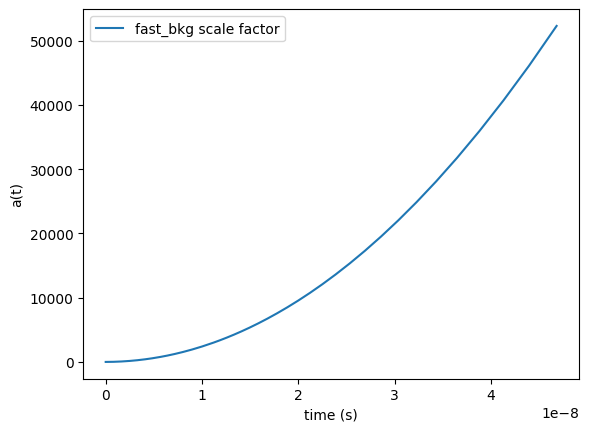

In [13]:
plt.plot(a_fast, t_fast, label = "fast_bkg scale factor")
plt.xlabel("time (s)")
plt.ylabel("a(t)")
plt.legend()

In [15]:
abd_model = AbundanceModel(
NuclearRates(nuclear_net='key_PRIMAT_2023')
)

In [29]:
Yn, Yp, Yd, Yt, YHe3, Ya, YLi7, YBe7 = abd_model(rho_g_vec, rho_nu_vec, rho_NP_vec, p_NP_vec, t_vec=t_vec, a_vec=a_vec, eta_fac = 1.5) # eta_fac is the baryon density

Compiling abundance model...


In [32]:
abunds = [
    ("Yn (neutrons)", Yn),
    ("Yp (protons/H)", Yp),
    ("Yd (deuterium)", Yd),
    ("Yt (tritium)", Yt),
    ("YHe3",          YHe3),
    ("Ya (He-4)",     Ya),
    ("YLi7",          YLi7),
    ("YBe7",          YBe7),
]
print("Primordial yields:")
for name, val in abunds:
    # convert JAX scalars to Python float for neat formatting
    print(f"  {name:16s}: {float(val):.6e}")

Primordial yields:
  Yn (neutrons)   : 2.455974e-11
  Yp (protons/H)  : 7.490174e-01
  Yd (deuterium)  : 9.036849e-06
  Yt (tritium)    : 2.803467e-08
  YHe3            : 6.203465e-06
  Ya (He-4)       : 6.273647e-02
  YLi7            : 1.216655e-11
  YBe7            : 8.845446e-10


In [34]:
D_over_H = Yd/Yp
YHe = 4*Ya

The abundances above are the predictions for the BBN abundances of each of
these nuclei in standard cosmology.

trend:  higher Neff_vec[-1] → faster expansion → higher D/H and higher
𝑌
𝑃
 .

Change the rate at which the universe expands. Pass a nonzero value into
bkg_model to do so, where the syntax you should use is t_vec, a_vec,
rho_g_vec, rho_nu_vec, rho_NP_vec, p_NP_vec, Neff_vec =
bkg_model(jnp.asarray(value)) and you use a float in place of value .
Make sure you format integer inputs as floats, like 1. or 2. , etc, otherwise the
code may run slower. Positive values make the universe expand faster, while
negative values make it expand slower. Plot D/H and YP as a function of the last
entry in Neff_vec (i.e., Neff_vec[-1] ) in each value of the input you use.